# Before your start:
- Read the README.md file
- Comment as much as you can and use the resources (README.md file)
- Happy learning!

In [1]:
%matplotlib inline
# import numpy and pandas
import numpy as np
import pandas as pd

# Challenge 1 - Analysis of Variance

In this part of the lesson, we will perform an analysis of variance to determine whether the factors in our model create a significant difference in the group means. We will be examining a dataset of FIFA players. We'll start by loading the data using the code in the cell below.

In [2]:
# Run this code:

fifa = pd.read_csv('fifa.csv')

Let's examine the dataset by looking at the `head`.

In [3]:
# Your code here:

fifa.head()

,Name,Age,Nationality,Overall,Potential,Club,Value,Preferred Foot,Position,Weak Foot,Acceleration,SprintSpeed,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties
0,L. Messi,31,Argentina,94,94,FC Barcelona,€110.5M,Left,RF,4.0,91.0,86.0,72.0,59.0,94.0,48.0,22.0,94.0,94.0,75.0
1,Cristiano Ronaldo,33,Portugal,94,94,Juventus,€77M,Right,ST,4.0,89.0,91.0,88.0,79.0,93.0,63.0,29.0,95.0,82.0,85.0
2,Neymar Jr,26,Brazil,92,93,Paris Saint-Germain,€118.5M,Right,LW,5.0,94.0,90.0,81.0,49.0,82.0,56.0,36.0,89.0,87.0,81.0
3,De Gea,27,Spain,91,93,Manchester United,€72M,Right,GK,3.0,57.0,58.0,43.0,64.0,12.0,38.0,30.0,12.0,68.0,40.0
4,K. De Bruyne,27,Belgium,91,92,Manchester City,€102M,Right,RCM,5.0,78.0,76.0,90.0,75.0,91.0,76.0,61.0,87.0,94.0,79.0


Player's values are expressed in millions of euros. We would like this column to be numeric. Therefore, let's create a numeric value column. Do this by stripping all non-numeric characters from each cell. Assign this new data to `ValueNumeric`. There is no need to multiply the value to be expressed in millions. 

In [4]:
# Your code here:
fifa['ValueNumeric']=fifa.Value.apply(lambda value:int(float(value[1:-1])*10**6) if value.find('M')!=-1 else 
                 (int(float(value[1:-1])*10**5) if value.find('K')!=-1 else 0))

In [5]:
fifa.columns=['Name', 'Age', 'Nationality', 'Overall', 'Potential', 'Club', 'Value',
       'PreferredFoot', 'Position', 'WeakFoot', 'Acceleration',
       'SprintSpeed', 'Stamina', 'Strength', 'LongShots', 'Aggression',
       'Interceptions', 'Positioning', 'Vision', 'Penalties', 'ValueNumeric']

#### We'd like to determine whether a player's preffered foot and position have an impact on their value. 

Using the `statsmodels` library, we are able to produce an ANOVA table without munging our data. Create an ANOVA table with value as a function of position and preferred foot. Recall that pivoting is performed by the `C` function.

Hint: For columns that have a space in their name, it is best to refer to the column using the dataframe (For example: for column `A`, we will use `df['A']`).

In [6]:
# Your code here:
import statsmodels.api as sm
from statsmodels.formula.api import ols
moore_lm = ols('ValueNumeric ~ C(Nationality)+ C(PreferredFoot)',data=fifa).fit()
table = sm.stats.anova_lm(moore_lm, typ=2) # Type 2 ANOVA DataFrame


In [7]:
table

,sum_sq,df,F,PR(>F)
C(Nationality),3.473642e+17,163.0,2.811886,2.337752e-29
C(PreferredFoot),4.722532e+15,1.0,6.231251,1.256038e-02
Residual,1.363727e+19,17994.0,NaN,NaN


What is your conclusion from this ANOVA?

In [8]:
# Your conclusions here:

#se descarta la hipótesis nula pues el valor de F es grande y el de PR muy próximo a 0

After looking at a model of both preffered foot and position, we decide to create an ANOVA table for nationality. Create an ANOVA table for numeric value as a function of nationality.

In [9]:
# Your code here:
moore_lm = ols('ValueNumeric ~ C(Nationality)',data=fifa).fit()
table = sm.stats.anova_lm(moore_lm, typ=2) 


In [10]:
table

,sum_sq,df,F,PR(>F)
C(Nationality),3.469345e+17,163.0,2.813214,2.175409e-29
Residual,1.365104e+19,18043.0,NaN,NaN


In [11]:
#la misma que anteriormente

What is your conclusion from this ANOVA?

# Challenge 2 - Linear Regression

Our goal with using linear regression is to create a mathematical model that will enable us to predict the outcome of one variable using one or more additional independent variables.

We'll start by ensuring there are no missing values. Examine all variables for all missing values. If there are missing values in a row, remove the entire row.

In [12]:
# Your code here:
fifa = fifa.dropna()
fifa.isnull().sum()

Name             0
Age              0
Nationality      0
Overall          0
Potential        0
Club             0
Value            0
PreferredFoot    0
Position         0
WeakFoot         0
Acceleration     0
SprintSpeed      0
Stamina          0
Strength         0
LongShots        0
Aggression       0
Interceptions    0
Positioning      0
Vision           0
Penalties        0
ValueNumeric     0
dtype: int64

Using the FIFA dataset, in the cell below, create a linear model predicting value using stamina and sprint speed. create the model using `statsmodels`. Print the model summary.

Hint: remember to add an intercept to the model using the `add_constant` function.

In [18]:
# Your code here:
import statsmodels.api as sm
fifa.Stamina = sm.add_constant(fifa.Stamina, prepend=False)
fifa.SprintSpeed = sm.add_constant(fifa.SprintSpeed, prepend=False)
mod = ols('fifa.ValueNumeric~fifa.Stamina + fifa.SprintSpeed',data = fifa)

res = mod.fit()

print(res.summary())


                            OLS Regression Results                            
Dep. Variable:      fifa.ValueNumeric   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     8.264
Date:                Wed, 18 Sep 2019   Prob (F-statistic):           0.000259
Time:                        18:01:36   Log-Likelihood:            -3.3250e+05
No. Observations:               17918   AIC:                         6.650e+05
Df Residuals:                   17915   BIC:                         6.650e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept         2.502e+07   9.93e+05  

Report your findings from the model summary. In particular, report about the model as a whole using the F-test and how much variation is predicted by the model using the r squared.

In [19]:
# Your conclusions here:
A = np.identity(len(res.params))
A = A[1:,:]
print(res.f_test(A))

<F test: F=array([[8.26428469]]), p=0.00025853624029325564, df_denom=1.79e+04, df_num=2>


In [20]:
print(res.f_test(A),res.f_pvalue)

<F test: F=array([[8.26428469]]), p=0.00025853624029325564, df_denom=1.79e+04, df_num=2> 0.00025853624029386


In [21]:
#Son iguales los resultados, eso significa que el la regresión aunque tiene mucho error está  bien hecha

Next, create a second regression model predicting value using potential. Create the model using `statsmodels` and print the model summary. Remember to add a constant term.

In [22]:
# Your code here:
fifa.Potential = sm.add_constant(fifa.Potential, prepend=False)
mod = ols('fifa.ValueNumeric~fifa.Potential',data = fifa)
result = mod.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:      fifa.ValueNumeric   R-squared:                       0.019
Model:                            OLS   Adj. R-squared:                  0.019
Method:                 Least Squares   F-statistic:                     349.6
Date:                Wed, 18 Sep 2019   Prob (F-statistic):           2.86e-77
Time:                        18:01:44   Log-Likelihood:            -3.3234e+05
No. Observations:               17918   AIC:                         6.647e+05
Df Residuals:                   17916   BIC:                         6.647e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept       7.336e+07   2.39e+06     30.

Report your findings from the model summary. In particular, report about the model as a whole using the F-test and how much variation is predicted by the model using the r squared.

In [23]:
# Your conclusions here:
#Se puede decir que el modelo de regresión lineal no se ajusta bién para esos datos, es decir, la relación
#entre ellos no es lineal
A = np.identity(len(result.params))
A = A[1:,:]
print(result.f_test(A),result.f_pvalue)

<F test: F=array([[349.57030969]]), p=2.8572849906864886e-77, df_denom=1.79e+04, df_num=1> 2.8572849906806418e-77


Plot a scatter plot of value vs. potential. Do you see a linear relationship?

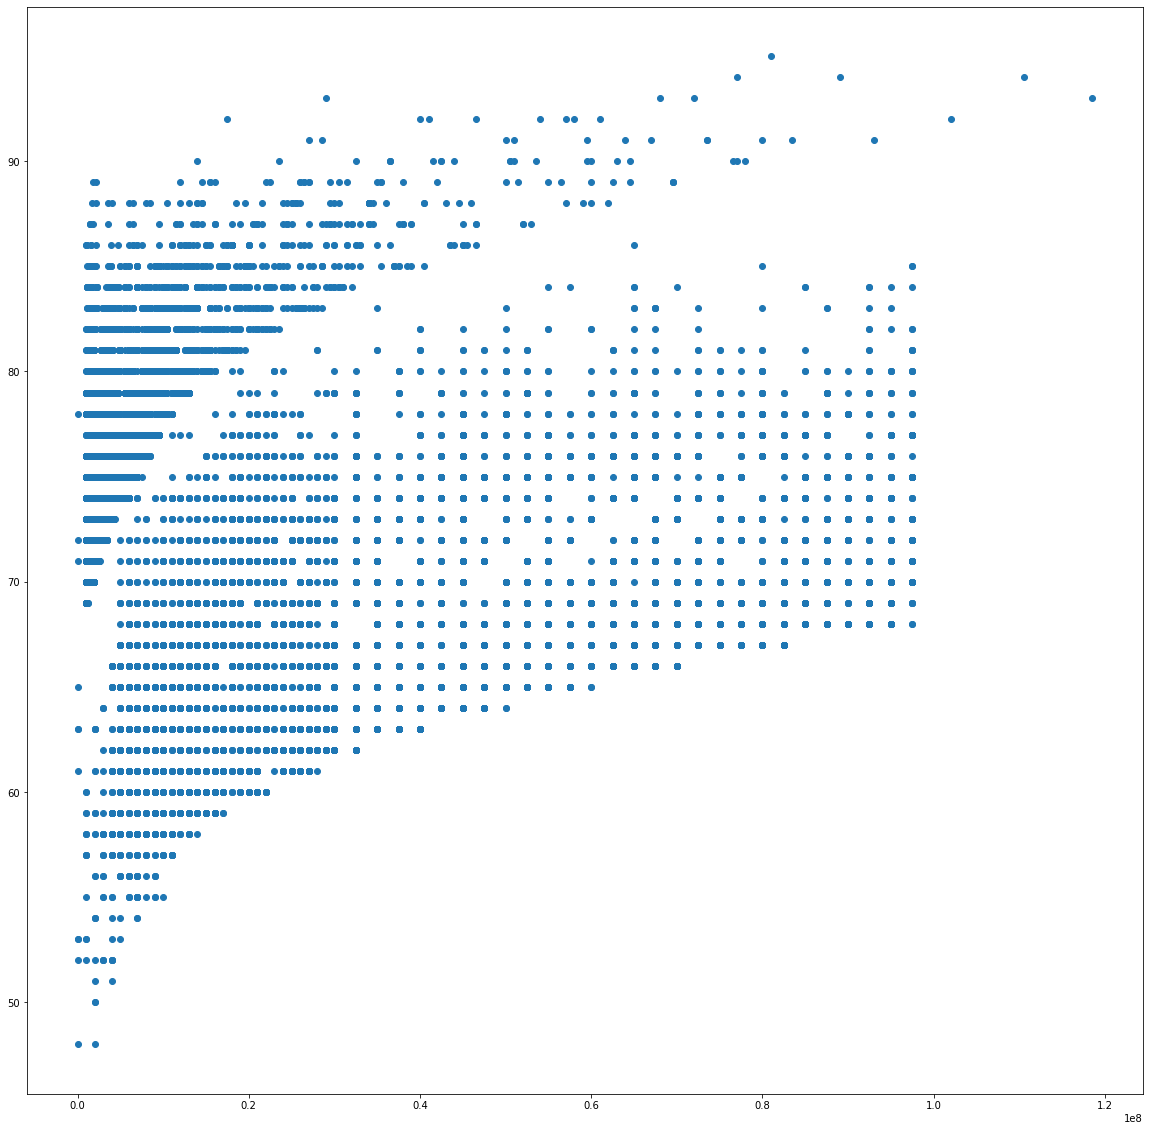

In [24]:
# Your code here:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(20,20))
plt.scatter(fifa.ValueNumeric,fifa.Potential)

In [ ]:
#Se puede ver que no hay una relación lineal